In [133]:
# execfile ("D:/measuring/analysis/scripts/setup_analysis.py")

import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from analysis.lib.sim import electron_nuclear_sim as nsc; reload(nsc)

<module 'analysis.lib.sim.electron_nuclear_sim' from 'analysis/lib/sim/electron_nuclear_sim.py'>

## Fingerprint

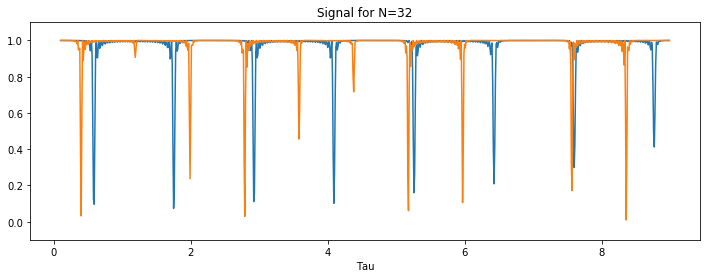

In [134]:
reload(nsc)
NVsys = nsc.NV_system(use_hf_library = True)
nsc.C13_fingerprint(NVsys,N=32,tau_range =  np.arange(0.1e-6,9e-6,1e-8),quick_calc = False)

## Prepare X, and measure XY

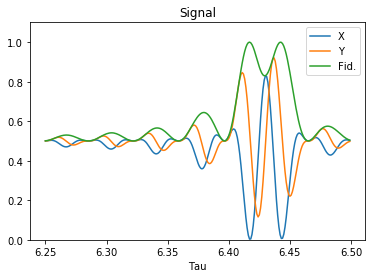

Max fid.  0.99995598289  at  6.417


In [351]:
reload(nsc)
NVsys = nsc.NV_system(use_hf_library = True)
nsc.prepare_X_and_measure_XY(NVsys,tau_range =  np.arange(6.25e-6,6.5e-6,1e-9),meas='eXY')

### Finite pulse durations

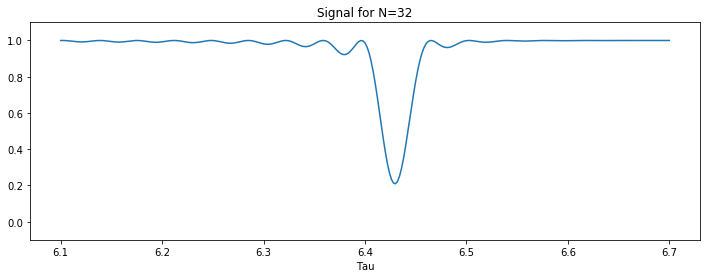

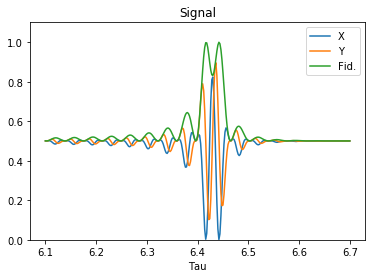

Max fid.  0.99922385756  at  6.442


In [354]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')

nsc.C13_fingerprint(NVsys,N=32,tau_range =  np.arange(6.1e-6,6.7e-6,2e-9),quick_calc = False)
nsc.prepare_X_and_measure_XY(NVsys,tau_range =  np.arange(6.1e-6,6.7e-6,2e-9),meas='eXY')

# Monte Carlo

## Microwave Pi pulse fidelities

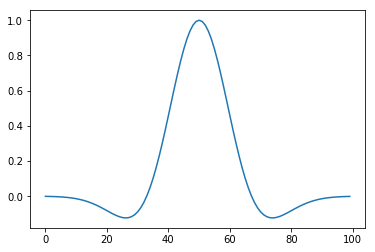

In [89]:
reload(nsc)
plt.plot(nsc.gaussian_envelope(np.arange(0,100,1),100.0))

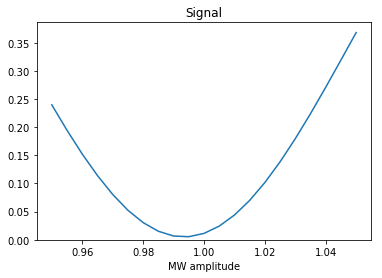

Min sig.  0.00547657176452  at  0.995


In [365]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')
fids = nsc.sweep_MW_amp(NVsys,N=11,amp_range=np.arange(0.95,1.05,0.005))

Infidelity is 0.008517 \pm 0.004594


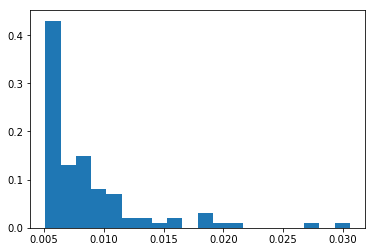

In [371]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')
infids = nsc.MonteCarlo_MWFid(NVsys,sigma=0.005)

plt.figure()
weights = np.ones_like(infids)/len(infids)
plt.hist(infids,bins = 20, weights = weights)
plt.show()
plt.close()

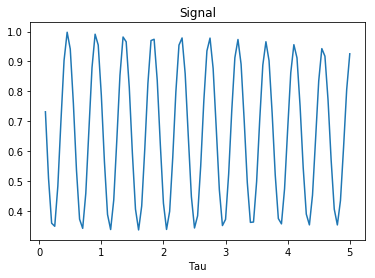

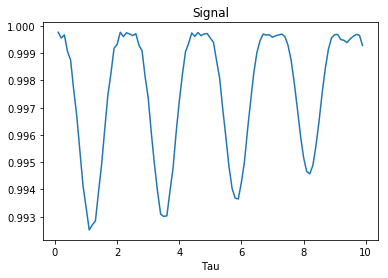

Min sig.  0.992514947456  at  1.1


In [251]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')
nsc.e_ramsey(NVsys)
nsc.hahn_echo(NVsys)


## Prepare and measure fidelities

Fidelity is 0.999248 \pm 0.000225


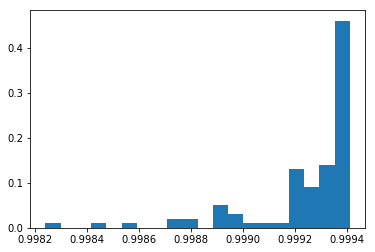

In [372]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')
infids = nsc.MonteCarlo_MWAmp_CGate_fid(NVsys,tau=6.442e-6,sigma=0.005, meas = 'eXY')

plt.figure()
weights = np.ones_like(infids)/len(infids)
plt.hist(infids,bins = 20, weights = weights)
plt.show()
plt.close()

## Investigate composite pulse schemes

### Standard dd sequence

For reference, the standard fingerprint and scheme:

In [ ]:
reload(nsc)
NVsys = nsc.NV_system(use_hf_library = True)
nsc.C13_fingerprint(NVsys,N=32,tau_range =  np.arange(5e-6,7e-6,1e-8),quick_calc = False)

In [ ]:
reload(nsc)
NVsys = nsc.NV_system(use_hf_library = True)
nsc.C13_fingerprint(NVsys,N=32,tau_range =  np.arange(6.35e-6,6.5e-6,1e-9),quick_calc = False)

In [ ]:
reload(nsc)
NVsys = nsc.NV_system(use_hf_library = True)
nsc.prepare_X_and_measure_XY(NVsys,tau_range =  np.arange(6.35e-6,6.5e-6,0.5e-9),meas='nXY')

### Composite pulses

Using the pulse schemes from http://journals.aps.org/pra/pdf/10.1103/PhysRevA.90.032319, http://journals.aps.org/pra/pdf/10.1103/PhysRevA.92.042304

#### 5 Pulse

In [ ]:
reload(nsc)
NVsys = nsc.NV_system(use_hf_library = True)
nsc.C13_fingerprint(NVsys,N=32,tau_range =  np.arange(1.5e-6,2.1e-6,0.2e-8),quick_calc = True)

In [ ]:
reload(nsc)
NVsys = nsc.composite_gate_NV_system(use_hf_library = True,mw_duration = 100e-9, composite_scheme = '5_pulse',f3DD = 0.2)
nsc.C13_fingerprint(NVsys,N=96,tau_range =  np.arange(1.82e-6,1.88e-6,0.2e-8),quick_calc = False)

In [ ]:
reload(nsc)
NVsys = nsc.composite_gate_NV_system(use_hf_library = True,mw_duration = 100e-9, composite_scheme = '5_pulse',f3DD = 0.2)
nsc.prepare_X_and_measure_XY(NVsys,N=96,tau_range =  np.arange(1.82e-6,1.88e-6,1e-9),meas='nXY',c_num = 1)

In [ ]:
reload(nsc)
NVsys = nsc.composite_gate_NV_system(use_hf_library = True,mw_duration = 100e-9, composite_scheme = '5_pulse',f3DD = 0.18)
fids = nsc.MonteCarlo_MWAmp_CGate_fid(NVsys,N=80,tau=1.8952e-6,sigma=0.02, meas = 'nXY')

plt.figure()

weights = np.ones_like(fids)/len(fids)
plt.hist(fids,bins = 20, weights = weights)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.show()
plt.close()

In [ ]:
reload(nsc)
NVsys = nsc.composite_gate_NV_system(use_hf_library = True,mw_duration = 100e-9, composite_scheme = 'none',f3DD = 0.00)
nsc.C13_fingerprint(NVsys,N=30,tau_range =  np.arange(0.0e-6,1.0e-6,1e-9),quick_calc = True)
nsc.C13_fingerprint(NVsys,N=30,tau_range =  np.arange(0.5e-6,0.6e-6,1e-9),quick_calc = True)


With instaneous microwave pulses this works very well

In [ ]:
reload(nsc)
NVsys = nsc.composite_gate_NV_system(use_hf_library = True,mw_duration = 10e-9, composite_scheme = '5_pulse',f3DD = 0.04)
nsc.C13_fingerprint(NVsys,N=400,tau_range =  np.arange(1.62e-6,1.66e-6,0.5e-9),quick_calc = False)

In [ ]:
reload(nsc)
NVsys = nsc.composite_gate_NV_system(use_hf_library = True,mw_duration = 10e-9, composite_scheme = '5_pulse',f3DD = 0.04)
nsc.prepare_X_and_measure_XY(NVsys,N=400,tau_range =  np.arange(1.62e-6,1.66e-6,0.2e-9),meas='nXY',c_num = 1)

In [ ]:
1.64/3.0 * (3.0/5.0)

In [ ]:
reload(nsc)
NVsys = nsc.composite_gate_NV_system(use_hf_library = True, composite_scheme = 'none',f3DD = 0.00)
nsc.C13_fingerprint(NVsys,N=64,tau_range =  np.arange(4.0e-6,5.3e-6,1e-9),quick_calc = True)

In [ ]:
reload(nsc)
NVsys = nsc.composite_gate_NV_system(use_hf_library = True, composite_scheme = '5_pulse',f3DD = 0.24)
nsc.C13_fingerprint(NVsys,N=64,tau_range =  np.arange(5.2e-6,5.3e-6,2e-9),quick_calc = False)

In [ ]:
reload(nsc)
NVsys = nsc.composite_gate_NV_system(use_hf_library = True,mw_duration = 100e-9, composite_scheme = '5_pulse',f3DD = 0.04)
nsc.prepare_X_and_measure_XY(NVsys,N=400,tau_range =  np.arange(1.72e-6,1.75e-6,0.2e-9),meas='nXY',c_num = 1)